Training and Testing Data

In [1]:
# import packages
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor 

In [2]:
# Training Data and testing data
traindata = pd.read_csv("train_data.csv")
testdata = pd.read_csv("test_data.csv")

In [3]:
# China
rx_train_c = traindata.T[7:].T
rx_test_c = testdata.T[7:].T
ry_train_c_all = traindata['CSI300']
ry_test_c_all = testdata['CSI300']
ry_train_c_r = traindata['cproducts_ch']
ry_test_c_r = testdata['cproducts_ch']
ry_train_c_p = traindata['healthcare_ch']
ry_test_c_p = testdata['healthcare_ch']

In [4]:
# USA
rx_train_u = traindata[['CSI300', 'cproducts_ch', 'healthcare_ch', 'lNew_cases_CH', 'lNew_deaths_CH','lNew_cases_US', 'lNew_deaths_US', 'lCOMEX_Gold', 'lUS_Tbill_10yr','lSP500', 'lDJI_Retail','lDJI_Pharma']]
rx_test_u = testdata[['CSI300', 'cproducts_ch', 'healthcare_ch', 'lNew_cases_CH', 'lNew_deaths_CH','lNew_cases_US', 'lNew_deaths_US', 'lCOMEX_Gold', 'lUS_Tbill_10yr','lSP500', 'lDJI_Retail','lDJI_Pharma']]
ry_train_u_all = traindata['SP500']
ry_test_u_all = testdata['SP500']
ry_train_u_r = traindata['DJI_Retail']
ry_test_u_r = testdata['DJI_Retail']
ry_train_u_p = traindata['DJI_Pharma']
ry_test_u_p = testdata['DJI_Pharma']

In [5]:
# Standardize the data
def standardize(x):
    return (x - x.mean())/x.std()

def standardize_test(x,y):
    return (x - y.mean())/y.std()

In [6]:
# Standardize and add the offset
# China
x_train_c = standardize(rx_train_c)
x_train_c = pd.concat([x_train_c,pd.DataFrame(list(1 for i in range(184)))],axis = 1)
x_test_c = standardize_test(rx_test_c, rx_train_c)
x_test_c = pd.concat([x_test_c,pd.DataFrame(list(1 for i in range(23)))],axis = 1)
y_train_c_all = standardize(ry_train_c_all)
y_test_c_all = standardize_test(ry_test_c_all, ry_train_c_all)
y_train_c_r = standardize(ry_train_c_r)
y_test_c_r = standardize_test(ry_test_c_r, ry_train_c_r)
y_train_c_p = standardize(ry_train_c_p)
y_test_c_p = standardize_test(ry_test_c_p, ry_train_c_p)
# USA
x_train_u = standardize(rx_train_u)
x_train_u = pd.concat([x_train_u,pd.DataFrame(list(1 for i in range(184)))],axis = 1)
x_test_u = standardize_test(rx_test_u, rx_train_u)
x_test_u = pd.concat([x_test_u,pd.DataFrame(list(1 for i in range(23)))],axis = 1)
y_train_u_all = standardize(ry_train_u_all)
y_test_u_all = standardize_test(ry_test_u_all, ry_train_u_all)
y_train_u_r = standardize(ry_train_u_r)
y_test_u_r = standardize_test(ry_test_u_r, ry_train_u_r)
y_train_u_p = standardize(ry_train_u_p)
y_test_u_p = standardize_test(ry_test_u_p, ry_train_u_p)

SVR

In [7]:
# R^2 
def r_squre(y_true, y_pred):
    numerator = ((y_true - y_pred) ** 2).sum()
    denominator = ((y_true - np.average(y_true)) ** 2).sum()
    r2 = 1 - (numerator / denominator)
    return r2

When kernel = 'rbf'.

In [108]:
# USA
usa_y_list = [[y_train_u_all, y_train_u_r, y_train_u_p],[y_test_u_all, y_test_u_r, y_test_u_p]]
for i in range(3):
    y_test = usa_y_list[1][i]
    clst = SVR(kernel='rbf', C=1e3, gamma=0.01)
    y_train = usa_y_list[0][i]
    clst.fit(x_train_u, usa_y_list[0][i])
    y_predict = clst.predict(x_test_u)
    r2 = r_squre(y_test, y_predict)
    mse = mean_squared_error(y_test, y_predict, squared=True)
    mae = mean_absolute_error(y_test, y_predict)
    r2_train = r_squre(y_train,clst.predict(x_train_u))
    mse_train = mean_squared_error(y_train, clst.predict(x_train_u), squared=True)
    mae_train = mean_absolute_error(y_train, clst.predict(x_train_u))
    print("For test data: r2 is ",r2,". MSE is ",mse,". MAE is ",mae,"."" For training data: r2 is ",r2_train,". MSE is ",mse_train,". MAE is ",mae_train,".")

For test data: r2 is  -0.8374336082616127 . MSE is  0.04412548667931809 . MAE is  0.18583300132285785 . For training data: r2 is  0.9855524888076608 . MSE is  0.014368992109772107 . MAE is  0.09181467893318833 .
For test data: r2 is  -29.158428313784988 . MSE is  0.19293429691462638 . MAE is  0.402060463200943 . For training data: r2 is  0.9927043264423346 . MSE is  0.007256023157895446 . MAE is  0.07328919286264454 .
For test data: r2 is  0.7577860198367928 . MSE is  0.022321530207752082 . MAE is  0.11960511672094958 . For training data: r2 is  0.9697313982023696 . MSE is  0.030104098526991106 . MAE is  0.12714575124167812 .


In [106]:
# China
china_y_list = [[y_train_c_all, y_train_c_r, y_train_c_p],[y_test_c_all, y_test_c_r, y_test_c_p]]
for i in range(3):
    y_test = china_y_list[1][i]
    clst = SVR(kernel='rbf', C=1e3, gamma=0.01)
    y_train = china_y_list[0][i]
    clst.fit(x_train_c, y_train)
    y_predict = clst.predict(x_test_c)
    r2 = r_squre(y_test, y_predict)
    mse = mean_squared_error(y_test, y_predict, squared=True)
    mae = mean_absolute_error(y_test, y_predict)
    r2_train = r_squre(y_train,clst.predict(x_train_c))
    mse_train = mean_squared_error(y_train, clst.predict(x_train_c), squared=True)
    mae_train = mean_absolute_error(y_train, clst.predict(x_train_c))
    print("For test data: r2 is ",r2,". MSE is ",mse,". MAE is ",mae,"."" For training data: r2 is ",r2_train,". MSE is ",mse_train,". MAE is ",mae_train,".")

For test data: r2 is  -0.03250080650934706 . MSE is  0.01708084221922152 . MAE is  0.1034671077603408 . For training data: r2 is  0.9875960945805955 . MSE is  0.012336492889951227 . MAE is  0.08877896743635588 .
For test data: r2 is  -2.29839390469594 . MSE is  0.03338253511096213 . MAE is  0.16368477893788685 . For training data: r2 is  0.9934963237870474 . MSE is  0.006468330146577779 . MAE is  0.07056745431818731 .
For test data: r2 is  0.3648881227307018 . MSE is  0.013638670150191613 . MAE is  0.09413827675703454 . For training data: r2 is  0.9918897261236547 . MSE is  0.00806619630093046 . MAE is  0.07782530092582868 .


When kernel = 'rbf', it is overfitting. So we don't choose it.

When kernel = 'poly'.

In [109]:
for i in range(3):
    y_test = usa_y_list[1][i]
    clst = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,coef0=1)
    y_train = usa_y_list[0][i]
    clst.fit(x_train_u, usa_y_list[0][i])
    y_predict = clst.predict(x_test_u)
    r2 = r_squre(y_test, y_predict)
    mse = mean_squared_error(y_test, y_predict, squared=True)
    mae = mean_absolute_error(y_test, y_predict)
    r2_train = r_squre(y_train,clst.predict(x_train_u))
    mse_train = mean_squared_error(y_train, clst.predict(x_train_u), squared=True)
    mae_train = mean_absolute_error(y_train, clst.predict(x_train_u))
    print("For test data: r2 is ",r2,". MSE is ",mse,". MAE is ",mae,"."" For training data: r2 is ",r2_train,". MSE is ",mse_train,". MAE is ",mae_train,".")

For test data: r2 is  -5.477555879641066 . MSE is  0.15555680727537058 . MAE is  0.32907520211203867 . For training data: r2 is  0.9915910300136312 . MSE is  0.008363269062529767 . MAE is  0.08155313615961034 .
For test data: r2 is  -8.009146315018432 . MSE is  0.057634744490135906 . MAE is  0.1890364472890856 . For training data: r2 is  0.9936580047647608 . MSE is  0.00630752786983024 . MAE is  0.07130342149297063 .
For test data: r2 is  -2.5297620557027747 . MSE is  0.3252896067330919 . MAE is  0.40982396440785157 . For training data: r2 is  0.9854169947016189 . MSE is  0.01450374983480294 . MAE is  0.10088103405183689 .


In [110]:
china_y_list = [[y_train_c_all, y_train_c_r, y_train_c_p],[y_test_c_all, y_test_c_r, y_test_c_p]]
for i in range(3):
    y_test = china_y_list[1][i]
    clst = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,coef0=1)
    y_train = china_y_list[0][i]
    clst.fit(x_train_c, y_train)
    y_predict = clst.predict(x_test_c)
    r2 = r_squre(y_test, y_predict)
    mse = mean_squared_error(y_test, y_predict, squared=True)
    mae = mean_absolute_error(y_test, y_predict)
    r2_train = r_squre(y_train,clst.predict(x_train_c))
    mse_train = mean_squared_error(y_train, clst.predict(x_train_c), squared=True)
    mae_train = mean_absolute_error(y_train, clst.predict(x_train_c))
    print("For test data: r2 is ",r2,". MSE is ",mse,". MAE is ",mae,"."" For training data: r2 is ",r2_train,". MSE is ",mse_train,". MAE is ",mae_train,".")

For test data: r2 is  -5.453176073763052 . MSE is  0.1067560254034574 . MAE is  0.28464997065372244 . For training data: r2 is  0.9912479818165636 . MSE is  0.008704452867222047 . MAE is  0.08134058402682907 .
For test data: r2 is  -6.257356297636952 . MSE is  0.07345058183430068 . MAE is  0.248892300192347 . For training data: r2 is  0.993570563550622 . MSE is  0.0063944938599791515 . MAE is  0.07321767991864543 .
For test data: r2 is  -1.7056687798250039 . MSE is  0.05810271441051588 . MAE is  0.2072560441761698 . For training data: r2 is  0.9929959761475777 . MSE is  0.0069659585053982636 . MAE is  0.07768788007261762 .


When kernel = 'poly', it is overfitting. So we don't choose it.

In [10]:
# China
r2_list = []
mse_list = []
mae_list = []
r2_train_list = []
mse_train_list = []
mae_train_list = []
china_y_list = [[y_train_c_all, y_train_c_r, y_train_c_p],[y_test_c_all, y_test_c_r, y_test_c_p]]
for i in range(3):
    y_test = china_y_list[1][i]
    clst = svm.LinearSVR(max_iter=1000000)
    y_train = china_y_list[0][i]
    clst.fit(x_train_c, y_train)
    print(clst.coef_)
    y_predict = clst.predict(x_test_c)
    r2 = r_squre(y_test, y_predict)
    mse = mean_squared_error(y_test, y_predict, squared=True)
    mae = mean_absolute_error(y_test, y_predict)
    r2_train = r_squre(y_train,clst.predict(x_train_c))
    mse_train = mean_squared_error(y_train, clst.predict(x_train_c), squared=True)
    mae_train = mean_absolute_error(y_train, clst.predict(x_train_c))
    r2_list.append(r2)
    mse_list.append(mse)
    mae_list.append(mae)
    r2_train_list.append(r2_train)
    mse_train_list.append(mse_train)
    mae_train_list.append(mae_train)
    print("For test data: r2 is ",r2,". MSE is ",mse,". MAE is ",mae,"."" For training data: r2 is ",r2_train,". MSE is ",mse_train,". MAE is ",mae_train,".")

[ 0.04963522 -0.01507648  0.03981221 -0.00445732  0.03177864 -0.01814243
  0.96541607 -0.15091181 -0.06765874 -0.03307298  0.25837756 -0.03571318
 -0.00568802]
For test data: r2 is  0.5956586373686013 . MSE is  0.006689090191765801 . MAE is  0.06541827627091532 . For training data: r2 is  0.9768574683979976 . MSE is  0.023016756973730675 . MAE is  0.10252616076294159 .
[ 0.04183153 -0.01732371  0.02524027  0.00516116  0.00750632 -0.03005918
  0.09455811  0.77716528 -0.06623432 -0.05832504  0.22658993 -0.02935916
  0.0040531 ]
For test data: r2 is  0.36694454321972736 . MSE is  0.006407056471656242 . MAE is  0.06152191744147295 . For training data: r2 is  0.9902815727146561 . MSE is  0.009665609745749665 . MAE is  0.07070494846317905 .
[ 0.05089136 -0.02256195  0.00374219  0.04170071 -0.0252404  -0.06623634
  0.13955761 -0.22554767  0.8456412  -0.04164093  0.27002699 -0.03297346
  0.00107482]
For test data: r2 is  0.3340525994190904 . MSE is  0.014300845660377025 . MAE is  0.09492839684

In [11]:
# USA
usa_y_list = [[y_train_u_all, y_train_u_r, y_train_u_p],[y_test_u_all, y_test_u_r, y_test_u_p]]
for i in range(3):
    y_test = usa_y_list[1][i]
    clst = svm.LinearSVR(max_iter=1000000)
    y_train = usa_y_list[0][i]
    clst.fit(x_train_u, usa_y_list[0][i])
    print(clst.coef_)
    y_predict = clst.predict(x_test_u)
    r2 = r_squre(y_test, y_predict)
    mse = mean_squared_error(y_test, y_predict, squared=True)
    mae = mean_absolute_error(y_test, y_predict)
    r2_train = r_squre(y_train,clst.predict(x_train_u))
    mse_train = mean_squared_error(y_train, clst.predict(x_train_u), squared=True)
    mae_train = mean_absolute_error(y_train, clst.predict(x_train_u))
    r2_list.append(r2)
    mse_list.append(mse)
    mae_list.append(mae)
    r2_train_list.append(r2_train)
    mse_train_list.append(mse_train)
    mae_train_list.append(mae_train)
    print("For test data: r2 is ",r2,". MSE is ",mse,". MAE is ",mae,"."" For training data: r2 is ",r2_train,". MSE is ",mse_train,". MAE is ",mae_train,".")

[-0.06608464  0.19089683  0.01236568  0.06317082 -0.07168158 -0.21976356
  0.14164116 -0.11424217 -0.03211752  0.9173968   0.08370039 -0.05365401
  0.01956328]
For test data: r2 is  0.7706733612484439 . MSE is  0.005507219144107341 . MAE is  0.057025592339194596 . For training data: r2 is  0.9411468322864107 . MSE is  0.05853331354123275 . MAE is  0.14560425952990916 .
[-0.05518526  0.10989771  0.10340542  0.01889773 -0.024395   -0.09685489
  0.0670007  -0.05168693  0.00177976 -0.005476    0.90512527 -0.01776841
  0.00830336]
For test data: r2 is  0.032531435788846874 . MSE is  0.006189243858499192 . MAE is  0.05952836175428026 . For training data: r2 is  0.9785642939056739 . MSE is  0.02131920769163951 . MAE is  0.09668761603480894 .
[-0.08859082  0.35325944  0.07457713  0.03887549 -0.04759029 -0.44568559
  0.22614854 -0.2838888  -0.2759357   0.16157646 -0.09448128  0.83857056
  0.02515727]
For test data: r2 is  0.6833919568405482 . MSE is  0.029177407491669204 . MAE is  0.14150507795

In [12]:
# MSE, MAE 
pdmse = pd.DataFrame(mse_list,columns = ['SVR'],index = ['China_CSI300','China_Consumer products','China_Healthcare','USA_SP500','USA_Consumer products','USA_Healthcare'])
pdmae = pd.DataFrame(mae_list,columns = ['SVR'],index = ['China_CSI300','China_Consumer products','China_Healthcare','USA_SP500','USA_Consumer products','USA_Healthcare'])
pdmse_train = pd.DataFrame(mse_train_list,columns = ['SVR'],index = ['China_CSI300','China_Consumer products','China_Healthcare','USA_SP500','USA_Consumer products','USA_Healthcare'])
pdmae_train = pd.DataFrame(mae_train_list,columns = ['SVR'],index = ['China_CSI300','China_Consumer products','China_Healthcare','USA_SP500','USA_Consumer products','USA_Healthcare'])

Neural Network

In [15]:
# Build model by finding the best number
def find_nn(x_train,y_train):
    # number to choose
    fit_deep = 0
    nn_range = [250,300,350,400,450,500,550,600,650,700,750]
    # score for each number
    nn_scores = []
    # Find the best number
    for i in nn_range:
        # here we use 4 layers
        mlp =  MLPRegressor(alpha = 1e-5, hidden_layer_sizes = (i,i), random_state = 1)
        score = cross_val_score(mlp, x_train, y_train, cv = 3, scoring = 'explained_variance')
        # find by looking for the highest score
        if score.mean() > max(max(nn_scores,[0])):
            fit_deep = i
        nn_scores.append(score.mean())
    print(fit_deep)
    plt.plot(nn_range, nn_scores)
    plt.xlabel('depth')
    plt.ylabel('cross_score')
    figure = plt.figure()
    plt.show()

300


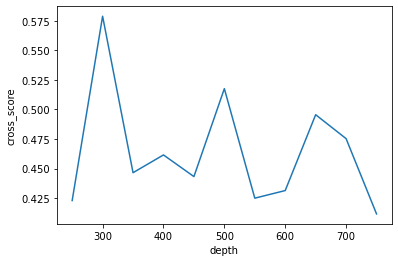

<Figure size 432x288 with 0 Axes>

In [131]:
# USA SP500
find_nn(x_train_u,y_train_u_all)

300


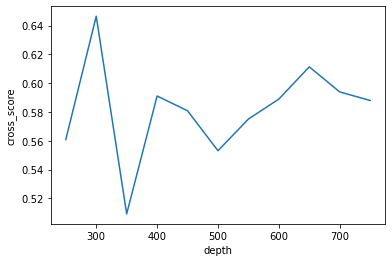

<Figure size 432x288 with 0 Axes>

In [130]:
# USA retail
find_nn(x_train_u,y_train_u_r)

450


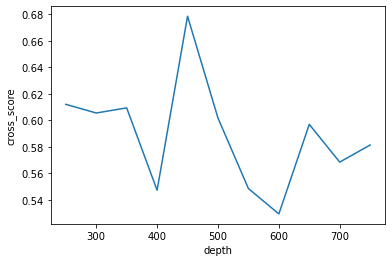

<Figure size 432x288 with 0 Axes>

In [129]:
# USA phar
find_nn(x_train_u,y_train_u_p)

450


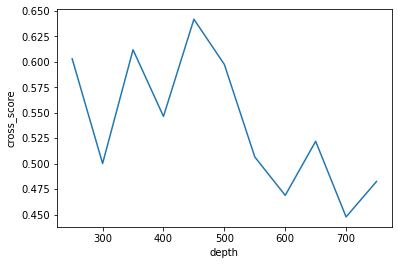

<Figure size 432x288 with 0 Axes>

In [128]:
# China CSI300
find_nn(x_train_c,y_train_c_all)

600


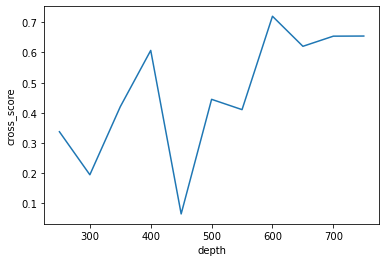

<Figure size 432x288 with 0 Axes>

In [126]:
# China retail
find_nn(x_train_c,y_train_c_r)

400


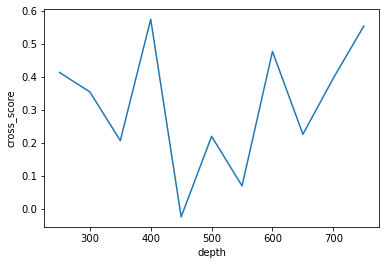

<Figure size 432x288 with 0 Axes>

In [127]:
# China phar
find_nn(x_train_c,y_train_c_p)

In [16]:
# China
mse_list = []
mae_list = []
mse_train_list = []
mae_train_list = []
china_y_list = [[y_train_c_all, y_train_c_r, y_train_c_p],[y_test_c_all, y_test_c_r, y_test_c_p]]
i_list = [450,600,400]
for i in range(3):
    y_test = china_y_list[1][i]
    y_train = china_y_list[0][i]
    j = i_list[i]
    mlp =  MLPRegressor(alpha = 1e-5, hidden_layer_sizes = (j,j), random_state = 1)
    mlp.fit(x_train_c, china_y_list[0][i])
    y_predict = mlp.predict(x_test_c)
    mse = mean_squared_error(y_test, y_predict, squared=True)
    mae = mean_absolute_error(y_test, y_predict)
    mse_train = mean_squared_error(y_train, mlp.predict(x_train_c), squared=True)
    mae_train = mean_absolute_error(y_train, mlp.predict(x_train_c))
    mse_list.append(mse)
    mae_list.append(mae)
    mse_train_list.append(mse_train)
    mae_train_list.append(mae_train)
    print("For test data: MSE is ",mse,". MAE is ",mae,"."" For training data: MSE is ",mse_train,". MAE is ",mae_train,".")

For test data: MSE is  0.05414531986856103 . MAE is  0.20469636834744798 . For training data: MSE is  0.014504622276430519 . MAE is  0.08392826025022872 .
For test data: MSE is  0.006750405176763855 . MAE is  0.0719961437984423 . For training data: MSE is  0.006947843020745019 . MAE is  0.062297997897094115 .
For test data: MSE is  0.17001448698606988 . MAE is  0.3879429115989939 . For training data: MSE is  0.009840973787749435 . MAE is  0.07715812495732996 .


In [17]:
# USA
i_list = [300,300,450]
for i in range(3):
    y_test = usa_y_list[1][i]
    y_train = usa_y_list[0][i]
    j = i_list[i]
    mlp =  MLPRegressor(alpha = 1e-5, hidden_layer_sizes = (j,j), random_state = 1)
    mlp.fit(x_train_u, usa_y_list[0][i])
    y_predict = mlp.predict(x_test_u)
    mse = mean_squared_error(y_test, y_predict, squared=True)
    mae = mean_absolute_error(y_test, y_predict)
    mse_train = mean_squared_error(y_train, mlp.predict(x_train_u), squared=True)
    mae_train = mean_absolute_error(y_train, mlp.predict(x_train_u))
    mse_list.append(mse)
    mae_list.append(mae)
    mse_train_list.append(mse_train)
    mae_train_list.append(mae_train)
    print("For test data: MSE is ",mse,". MAE is ",mae,"."" For training data: MSE is ",mse_train,". MAE is ",mae_train,".")

For test data: MSE is  0.07839524748896151 . MAE is  0.2566967858533895 . For training data: MSE is  0.017692006463519823 . MAE is  0.09066779389335261 .
For test data: MSE is  0.016523881408886852 . MAE is  0.11435188913964797 . For training data: MSE is  0.011556038705083347 . MAE is  0.078562743284747 .
For test data: MSE is  0.01274618937521328 . MAE is  0.09103274425846919 . For training data: MSE is  0.01887837946853573 . MAE is  0.10125709317297155 .


In [18]:
# MSE, MAE 
nmse = pd.DataFrame(mse_list,columns = ['NN'],index = ['China_CSI300','China_Consumer products','China_Healthcare','USA_SP500','USA_Consumer products','USA_Healthcare'])
nmae = pd.DataFrame(mae_list,columns = ['NN'],index = ['China_CSI300','China_Consumer products','China_Healthcare','USA_SP500','USA_Consumer products','USA_Healthcare'])
pdmse = pd.concat([pdmse,nmse],axis = 1)
pdmae = pd.concat([pdmae,nmae],axis = 1)
nmse_train = pd.DataFrame(mse_train_list,columns = ['NN'],index = ['China_CSI300','China_Consumer products','China_Healthcare','USA_SP500','USA_Consumer products','USA_Healthcare'])
nmae_train = pd.DataFrame(mae_train_list,columns = ['NN'],index = ['China_CSI300','China_Consumer products','China_Healthcare','USA_SP500','USA_Consumer products','USA_Healthcare'])
pdmse_train = pd.concat([pdmse_train,nmse_train],axis = 1)
pdmae_train = pd.concat([pdmae_train,nmae_train],axis = 1)

In [21]:
pdmae_train

,SVR,NN
China_CSI300,0.102526,0.083928
China_Consumer products,0.070705,0.062298
China_Healthcare,0.089935,0.077158
USA_SP500,0.145604,0.090668
USA_Consumer products,0.096688,0.078563
USA_Healthcare,0.200508,0.101257


In [22]:
pdmae

,SVR,NN
China_CSI300,0.065418,0.204696
China_Consumer products,0.061522,0.071996
China_Healthcare,0.094928,0.387943
USA_SP500,0.057026,0.256697
USA_Consumer products,0.059528,0.114352
USA_Healthcare,0.141505,0.091033


In [23]:
pdmse_train

,SVR,NN
China_CSI300,0.023017,0.014505
China_Consumer products,0.009666,0.006948
China_Healthcare,0.013804,0.009841
USA_SP500,0.058533,0.017692
USA_Consumer products,0.021319,0.011556
USA_Healthcare,0.104465,0.018878


In [24]:
pdmse

,SVR,NN
China_CSI300,0.006689,0.054145
China_Consumer products,0.006407,0.006750
China_Healthcare,0.014301,0.170014
USA_SP500,0.005507,0.078395
USA_Consumer products,0.006189,0.016524
USA_Healthcare,0.029177,0.012746


MSE & MAE

In [50]:
# We collect mse and mae data from Julia code
# Quadratic+l1
mse1_list = [0.0056675262,0.004179232,0.00463191488,0.00834485146,0.00620750251,0.0076500688]
mae1_list = [0.0654235421,0.058982864,0.06048266580,0.06547733314,0.07015449880,0.0699234155]
nmse = pd.DataFrame(mse1_list,columns = ['Quadratic+l1'],index = ['China_CSI300','China_Consumer products','China_Healthcare','USA_SP500','USA_Consumer products','USA_Healthcare'])
nmae = pd.DataFrame(mae1_list,columns = ['Quadratic+l1'],index = ['China_CSI300','China_Consumer products','China_Healthcare','USA_SP500','USA_Consumer products','USA_Healthcare'])
pdmse_train = pd.concat([pdmse_train,nmse],axis = 1)
pdmae_train = pd.concat([pdmae_train,nmae],axis = 1)

mse1_test_list = [0.00658264,0.007436762,0.0023011219,0.006920972,0.0058238115,0.0002598585]
mae1_test_list = [0.07957962,0.085442968,0.0441548061,0.081836681,0.0746842568,0.0141510298]
nmse = pd.DataFrame(mse1_test_list,columns = ['Quadratic+l1'],index = ['China_CSI300','China_Consumer products','China_Healthcare','USA_SP500','USA_Consumer products','USA_Healthcare'])
nmae = pd.DataFrame(mae1_test_list,columns = ['Quadratic+l1'],index = ['China_CSI300','China_Consumer products','China_Healthcare','USA_SP500','USA_Consumer products','USA_Healthcare'])
pdmse = pd.concat([pdmse,nmse],axis = 1)
pdmae = pd.concat([pdmae,nmae],axis = 1)

In [51]:
# Quadratic+l2
mse2_list = [0.00684214889,0.0093589136,0.0075627205,0.0071973823,0.00636182509,0.00631015334]
mae2_list = [0.05320435854,0.0655482328,0.0567373750,0.0625305587,0.06160085747,0.06473200953]
nmse = pd.DataFrame(mse2_list,columns = ['Quadratic+l2'],index = ['China_CSI300','China_Consumer products','China_Healthcare','USA_SP500','USA_Consumer products','USA_Healthcare'])
nmae = pd.DataFrame(mae2_list,columns = ['Quadratic+l2'],index = ['China_CSI300','China_Consumer products','China_Healthcare','USA_SP500','USA_Consumer products','USA_Healthcare'])
pdmse_train = pd.concat([pdmse_train,nmse],axis = 1)
pdmae_train = pd.concat([pdmae_train,nmae],axis = 1)

mse2_test_list = [0.001452254,0.0021418142,0.0273248561,0.00067464021,0.0016406149,0.00634160103]
mae2_test_list = [0.030550967,0.0380705204,0.1577910055,0.02077935390,0.0322777916,0.07741394394]
nmse = pd.DataFrame(mse2_test_list,columns = ['Quadratic+l2'],index = ['China_CSI300','China_Consumer products','China_Healthcare','USA_SP500','USA_Consumer products','USA_Healthcare'])
nmae = pd.DataFrame(mae2_test_list,columns = ['Quadratic+l2'],index = ['China_CSI300','China_Consumer products','China_Healthcare','USA_SP500','USA_Consumer products','USA_Healthcare'])
pdmse = pd.concat([pdmse,nmse],axis = 1)
pdmae = pd.concat([pdmae,nmae],axis = 1)

In [59]:
pdmae

,SVR,NN,Quadratic+l1,Quadratic+l2
China_CSI300,0.065418,0.204696,0.079580,0.030551
China_Consumer products,0.061522,0.071996,0.085443,0.038071
China_Healthcare,0.094928,0.387943,0.044155,0.157791
USA_SP500,0.057026,0.256697,0.081837,0.020779
USA_Consumer products,0.059528,0.114352,0.074684,0.032278
USA_Healthcare,0.141505,0.091033,0.014151,0.077414


In [60]:
pdmse

,SVR,NN,Quadratic+l1,Quadratic+l2
China_CSI300,0.006689,0.054145,0.006583,0.001452
China_Consumer products,0.006407,0.006750,0.007437,0.002142
China_Healthcare,0.014301,0.170014,0.002301,0.027325
USA_SP500,0.005507,0.078395,0.006921,0.000675
USA_Consumer products,0.006189,0.016524,0.005824,0.001641
USA_Healthcare,0.029177,0.012746,0.000260,0.006342


In [61]:
pdmae_train

,SVR,NN,Quadratic+l1,Quadratic+l2
China_CSI300,0.102526,0.083928,0.065424,0.053204
China_Consumer products,0.070705,0.062298,0.058983,0.065548
China_Healthcare,0.089935,0.077158,0.060483,0.056737
USA_SP500,0.145604,0.090668,0.065477,0.062531
USA_Consumer products,0.096688,0.078563,0.070154,0.061601
USA_Healthcare,0.200508,0.101257,0.069923,0.064732


In [62]:
pdmse_train

,SVR,NN,Quadratic+l1,Quadratic+l2
China_CSI300,0.023017,0.014505,0.005668,0.006842
China_Consumer products,0.009666,0.006948,0.004179,0.009359
China_Healthcare,0.013804,0.009841,0.004632,0.007563
USA_SP500,0.058533,0.017692,0.008345,0.007197
USA_Consumer products,0.021319,0.011556,0.006208,0.006362
USA_Healthcare,0.104465,0.018878,0.007650,0.006310


In [94]:
# Plot
def plot_mse(pdmse):
    labels = pdmse.index

    x_list = []
    for j in pdmse.columns:
        x_list.append([pdmse[j][i] for i in range(6)])
        
    x = np.arange(len(labels))  # the label locations
    width = 0.1  # the width of the bars
    widthlist = [-0.15,-0.05,0.05,0.15]

    fig, ax = plt.subplots(figsize=(12,6))
    for i in range(len(pdmse.columns)):
        ax.bar(x + widthlist[i], np.array(x_list[i]),width,label = pdmse.columns[i])

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('MSE')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.show()

In [112]:
# Plot
def plot_mae(pdmae):
    labels = pdmae.index

    x_list = []
    for j in pdmae.columns:
        x_list.append([pdmae[j][i] for i in range(6)])
        
    x = np.arange(len(labels))  # the label locations
    width = 0.1  # the width of the bars
    widthlist = [-0.15,-0.05,0.05,0.15]

    fig, ax = plt.subplots(figsize=(12,6))
    for i in range(len(pdmae.columns)):
        ax.bar(x + widthlist[i], np.array(x_list[i]),width,label = pdmae.columns[i])

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('MAE')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.show()

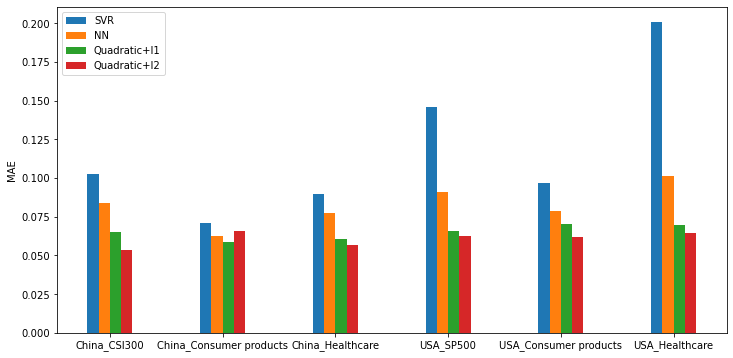

In [113]:
# mae train
plot_mae(pdmae_train)

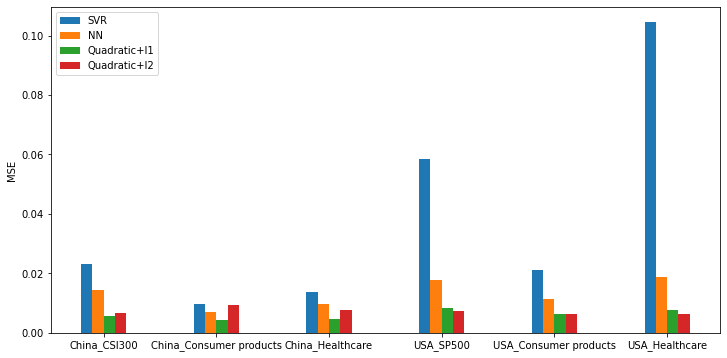

In [95]:
# mse train
plot_mse(pdmse_train)

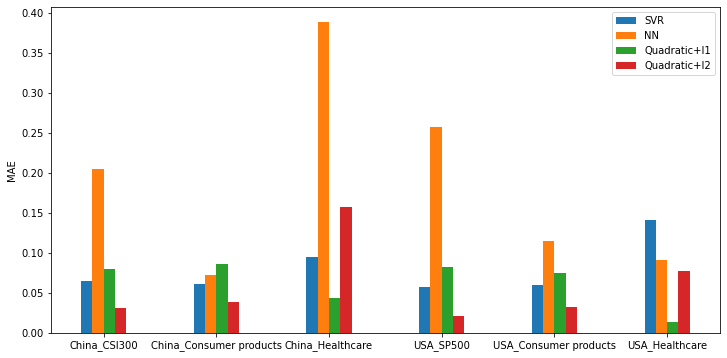

In [114]:
# mse 
plot_mae(pdmae)

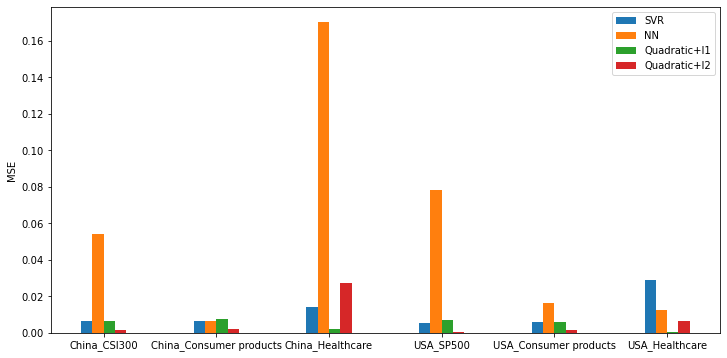

In [98]:
# mse train
plot_mse(pdmse)

Reference  
https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html  
https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
https://cloud.tencent.com/developer/news/570596